#  Estimando a Temperatura dos Componentes do Motor PMSM a partir de Técnicas de Machine Learning
####  O objetivo deste projeto é, através de técnicas de Machine Learning, modelar a temperatura do estator e do rotor de um motor PMSM a partir de um dataset gerado em um contexto de execução em tempo real a fim de prever as temperaturas em tempo de execução.

### Pontos a serem observados: 

1. Introdução aos conceitos e aplicações de Machine Learning;    
2. Introdução aos conceitos e aplicações do motor PMSM; 
3. Objetivos deste modelo;
4. Limitações(dados normalizados, previsões em tempo real de execução apenas, etc);

### Importância desse modelo:

Conforme explicado no dataset fornecido na plataforma Kaggle, a utilização de sensores para medir a temperatura do estator, do rotor e o torque é inviável devido, primeiro, a inacurácia deles e, segundo, economicamente inviável para aplicações comerciais.

Portanto, alcançar um modelo com boas métricas possibilitaria estimar a temperatura desses componentes citados acima sem a necessidade de sensores.



In [1]:
#A biblioteca Numpy facilita a execução de cálculos númericos.
import numpy as np

#A biblioteca Pandas oferece estruturas e operações de Álgebra Linear para processar dados.
import pandas as pd

#A biblioteca Matplotlib é utilizada principalmente para visualização de dados.
import matplotlib.pyplot as plt

#A biblioteca Seaborn atua em conjunto com a biblioteca Matplotlib para visualização de dados.
import seaborn as sns

# Métricas de erro para validação do modelo gerado. 
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Biblioteca que facilita a separação de um dataset em treino e teste.
from sklearn.model_selection import train_test_split



In [2]:
#Visualizar dados no próprio Jupyter-Notebook.
%matplotlib inline

In [3]:
#Leitura dos dados do dataset.
df = pd.read_csv('pmsm_temperature_data.csv')

In [4]:
#Mostrar cabeçalho do dataset.
df.head()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [8]:
#Mostrar informações gerais sobre o dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   pm              998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
 12  profile_id      998070 non-null  int64  
dtypes: float64(12), int64(1)
memory usage: 99.0 MB


In [9]:
#Visualizar algumas operações estatísticas do dataset.
df.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000,998070.000000
mean,-0.003905,0.004723,0.004780,-0.005690,-0.006336,-0.003333,0.006043,-0.003194,-0.004396,0.000609,-0.002208,-0.003935,50.732001
std,0.993127,1.002423,0.997878,1.002330,1.001229,0.997907,0.998994,0.997912,0.995686,1.001049,0.999597,0.998343,22.073125
min,-8.573954,-1.429349,-1.655373,-1.861463,-1.371529,-3.345953,-3.245874,-3.341639,-2.631991,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.599385,-1.037925,-0.826359,-0.927390,-0.951892,-0.266917,-0.756296,-0.257269,-0.672308,-0.747265,-0.761951,-0.725622,32.000000
50%,0.266157,-0.177187,0.267542,-0.099818,-0.140246,-0.187246,0.213935,-0.190076,0.094367,-0.057226,0.005085,0.006536,56.000000
75%,0.686675,0.650709,0.358491,0.852625,0.853584,0.547171,1.013975,0.499260,0.680691,0.697344,0.772239,0.725660,68.000000
max,2.967117,2.649032,2.274734,1.793498,2.024164,3.016971,1.060937,2.914185,2.917456,2.449158,2.326668,2.653781,81.000000


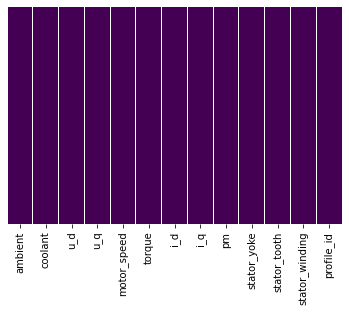

In [10]:
#Verificar se existe alguma linha em que esteja faltando alguma informação no dataset.
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap='viridis')

In [11]:
#Comprova que não tem nenhuma informação faltando no dataset, pois a soma é zero para cada feature.
df.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

# Visualização dos Dados 

Antes de partir para a geração do modelo, é importante entender um pouco o comportamento dos dados no contexto de motores. Para isso, a seguir, serão disponibilizados diferentes gráficos com diferentes finalidades.

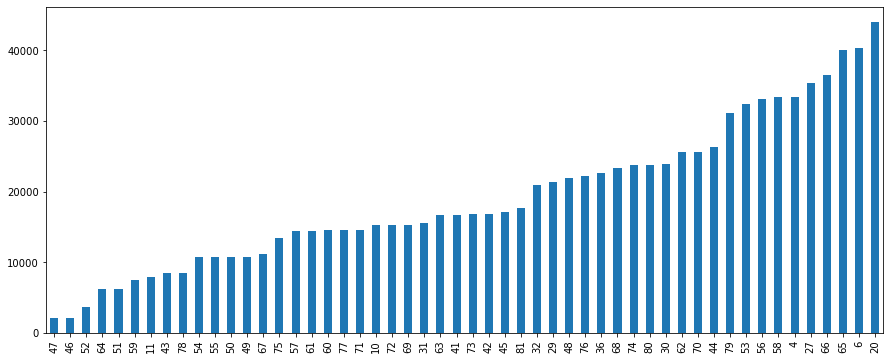

In [12]:
#Visualizar quais sessões(profile_id) tiveram os maiores números de dados coletados.
plt.figure(figsize=(15,6))
df['profile_id'].value_counts().sort_values().plot(kind='bar')

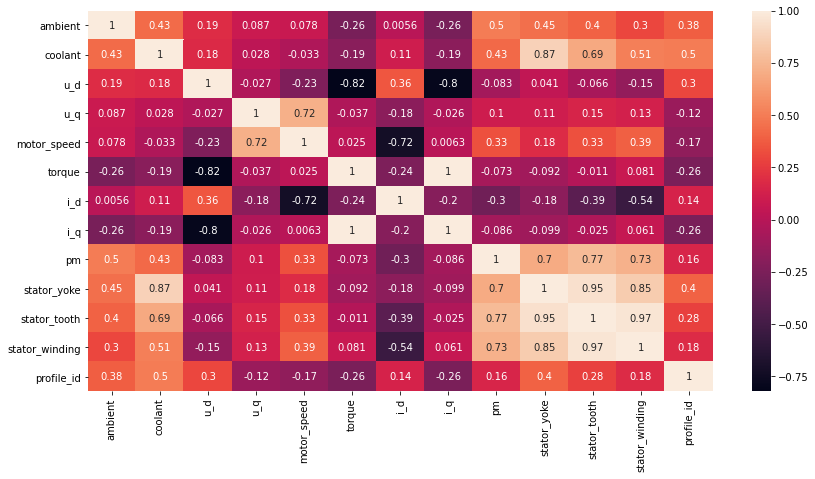

In [13]:
#Aqui o heatmap mostra uma espécie de gráfico distribuído em um perfil de cor para 
#ilustrar a correlação entre as variáveis.
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(), annot=True)

In [14]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

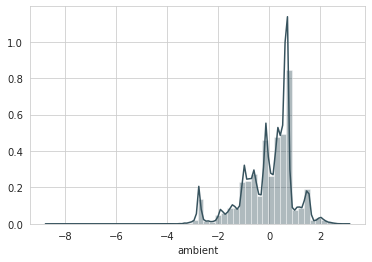

In [15]:
sns.distplot(df['ambient'])

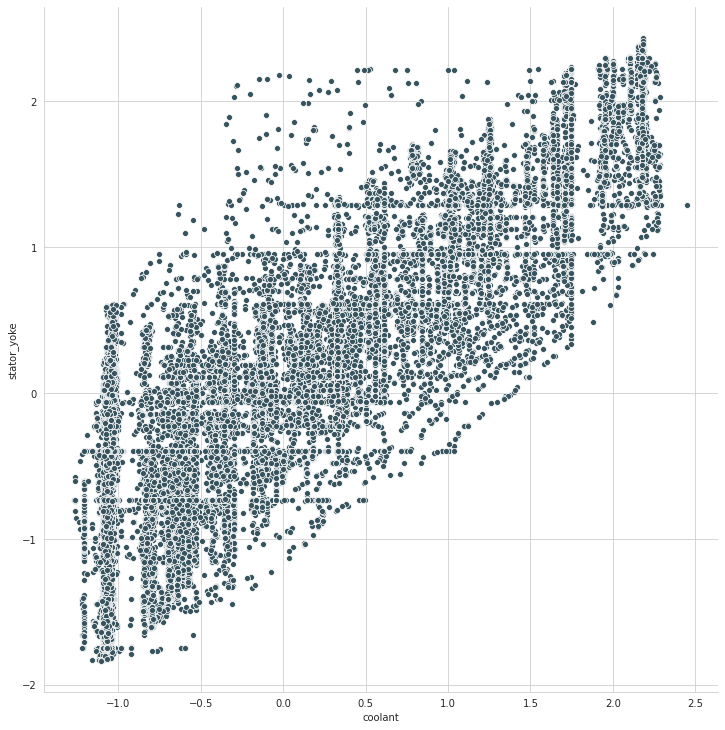

In [16]:
#Conforme apontado na distribuição heatmap, existe uma alta correlação entre a variável
#"coolant" e a variável "stator_yoke". Essa correlação pode ser confirmada através
#do plot a seguir. Ele ilustra a tendência linear entre as duas variáveis.
sns.pairplot(df.sample(40000),x_vars = "coolant", y_vars = "stator_yoke", height=10)

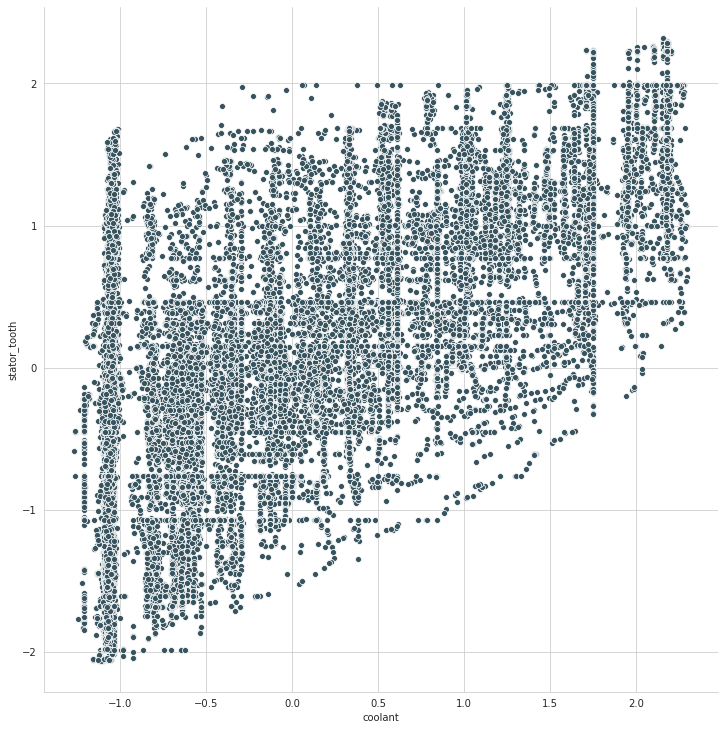

In [17]:
#Plot para ilustrar a alta correlação apontada na distruibuição do heatmap anterior.
sns.pairplot(df.sample(40000),x_vars = "coolant", y_vars = "stator_tooth", height=10)

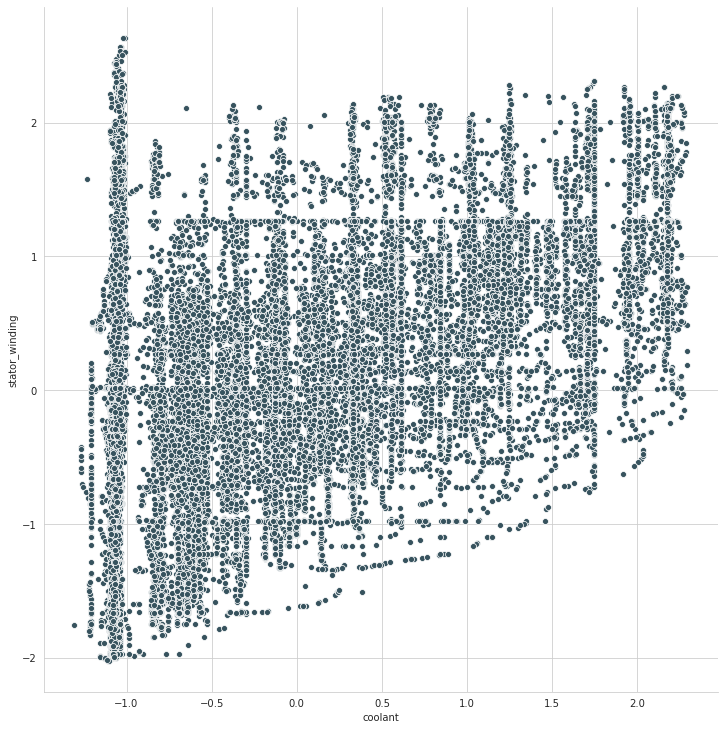

In [18]:
#Plot para ilustrar a alta correlação apontada na distruibuição do heatmap anterior.
sns.pairplot(df.sample(40000),x_vars = "coolant", y_vars = "stator_winding", height=10)

In [30]:
#Armazena todas sessões (profile_id) em um array e printa o total encontrado.
profile_id_list = df.profile_id.unique()
print(profile_id_list)
print("Total de Sessões ID gravadas: {0}".format(profile_id_list.size))

[ 4  6 10 11 20 27 29 30 31 32 36 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 73 74 75 76 77 78
 79 80 81 72]
Total de Sessões ID gravadas: 52


[70]


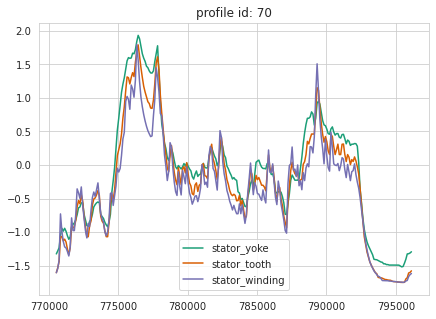

In [51]:
colunas = ['stator_yoke','stator_tooth', 'stator_winding']
#Cria um array de 8 elementos com valores aleatórios entre os 52 valores do array profile_id_list

profile_id_list = np.random.choice(profile_id_list, size=1, replace=False)
print(profile_id_list)
nbr_coluna = 2
nbr_grafico = len(profile_id_list)
#Função ceil: This mathematical function returns the ceil of the elements of array. 
#The ceil of the scalar x is the is the smallest integer i, such that i >= x
nbr_linha = int(np.ceil(nbr_grafico/nbr_coluna))
kolomlijst = list(df.columns.values)
plt.figure(figsize=(7,nbr_linha*5))

with sns.axes_style("whitegrid"):
    for i in range(0,nbr_grafico):
        #Plota mini subplots na seguinte sequência (conforme a sequência dos elementos do array
        #profile_id_list): esquerda -> direita -> esquerda ...
        plt.plot()
        #A função loc acessa uma porção específica do dataframe. 
        #Pode ser usada uma chamada booleana para retornar uma porção específica
        #se um dado especificado existir.
        temp = df.loc[df['profile_id'] == profile_id_list[i]]
        #Restringe a porção anterior para apenas os elementos definidos no vetor colunas.
        temp = temp.loc[:,colunas]
        #Restringe ainda mais a variável temp capturando apenas uma quantidade de 100 valores
        #Ou seja, para cada elemento do array colunas, captura-se apenas 100 valores.
        temp = temp.iloc[::100, :]
        ax1 = sns.lineplot(data=temp.loc[:,colunas], dashes = False,
                           palette=sns.color_palette('Dark2', n_colors=len(colunas)))
        ax1.set_title("profile id: {0}".format(profile_id_list[i]))
    plt.show
    plt.savefig(f'/home/trs/Interviewers/Presentation/PMSMGraphs.png')

##### Pontos para serem observados sobre os plots acima: 

1. As 3 curvas referentes a temperatura do estator seguem a mesma tendência. Isso confirma visualmente a correlação observada anteriormente.
2. Observa-se que o módulo temperatura yoke do estator, no geral, está sempre entre o módulo da temperatura winding e tooth do estator.
3. Observa-se que, quando há uma variação brusca na curva da temperatura winding do estator, as outras curvas de temperatura seguem uma tendência de variação mais suave. Isso indica que o calor dissipado pelo winding estator leva algum tempo para aquecer a temperatura tooth e yoke do estator. A razão por trás disso pode ter relação com os conceitos de inércia térmica dos estatores. 
4. Para ter observações mais acuradas sobre os dados, seria necessário ter os dados originais do dataset, antes da normalização. 
    

## Estimando a Temperatura do Enrolamento

Medir as temperaturas do rotor e estator de um motor elétrico não costuma ser confiável ou economicamente viável em aplicações comerciais. Devido a isso, justifica-se prever a temperatura do estator utilizando os dados disponíveis em um dataset ao invés de sensores. Neste modelo, o alvo (target) será a temperatura de enrolamento do estator. 

Uma vez gerado o modelo, o objetivo será prever/estimar a temperatura de enrolamento do estator a partir de dados fornecidos pelo fabricante do motor.

## Algoritmo para gerar o modelo: Random Forest Regressor

#### O que será feito:

1. Retirar a feature 'torque', pois, de acordo com as informações do fornecedor do dataset, essa feature não é um dado confiável e deve ser omitido nessa análise.
2. Existem três componentes básicos do estator do motor PMSM: **Enrolamento**, **Dente** e **Coroa** (winding_stator, tooth_stator e yoke_stator respectivamente). O objetivo do modelo é estimar a temperatura de cada um desses três componentes.
3. Será utilizado 30% do dataset para teste e o restante (70%) para treino do modelo.
4. Por fim, será avaliado o resultado das predições do modelo através de métricas de validação e gráficos.

In [53]:
#Separar variáveis de entrada das features alvos.

#Eliminar a feature 'torque' do dataframe.
X = df.drop('torque', axis=1).loc[:,'ambient':'i_q'].values

# y é a variável target que receberá as temperaturas do enrolamento do estator. 
# .loc captura todos os valores do dataset pertencentes a coluna "stator_winding".
y = df.loc[:, 'stator_winding'].values
        
#Separar os dados: 70% para treino e 30% (restante) para teste.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)


In [54]:
#Shape retorna a quantidade de entradas e colunas que o dataframe na variável X possui.
X.shape

(998070, 7)

In [55]:
#O módulo sklearn.ensemble inclui dois algoritmos de média baseados em
# árvores de decisão randomizadas: o algoritmo RandomForest e o método Extra-Trees.
#Essas implementações são importantes para a otimização do modelo.
from sklearn.ensemble import RandomForestRegressor

#Instancia o objeto RFR_modelo em termos do algoritmo Random Forest Regressor
#para que, a seguir, ele consiga receber o modelo gerado
RFR_modelo = RandomForestRegressor(n_estimators= 10, random_state=0)

#Treina o modelo a partir dos dados de treino e guarda-o no objeto RFR_modelo.
RFR_modelo.fit(X_train,y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

## Métricas de Validação e Visualização dos Resultados do Modelo

In [56]:
#Estimar os dados de X_test a partir do modelo gerado e guardar o resultado na 
#variável y_estimado.
y_estimado = RFR_modelo.predict(X_test)

#Métricas de Erro. Compara a diferença entre o valor estimado pelo modelo(y_estimado)
#e o valor real(y_test).
RFR_MSE = mean_squared_error(y_test,y_estimado)
RFR_MAE = mean_absolute_error(y_test,y_estimado)
print ("MSE: {0}".format(RFR_MSE))
print("MAE: {0}".format(RFR_MAE))

MSE: 0.019239372971680838
MAE: 0.05676093548212042


In [57]:
#Métricas de Validação do Modelo 

from sklearn import metrics

#A função abaixo fornece a variância do modelo gerado. Esta revela "o quão correto"
#o modelo gerado é capaz de prever a temperatura dos enrolamentos do estator.
metrics.explained_variance_score(y_test,y_estimado)

0.9807434797730579

Text(0, 0.5, 'Valores Estimados')

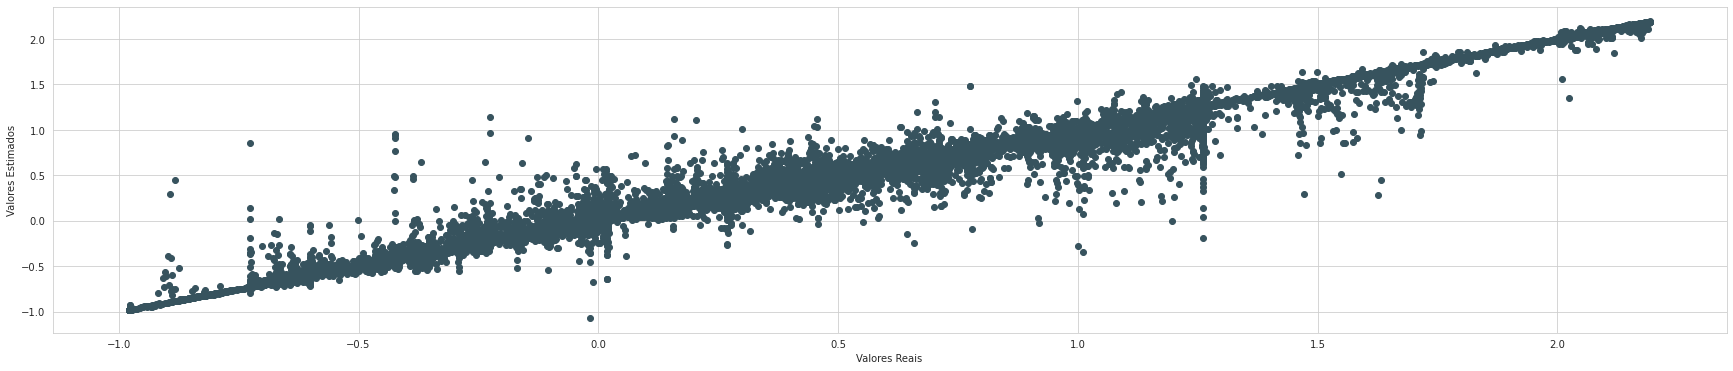

In [58]:
#Plotar os Valores Reais versus Valores Estimados para múltiplas sessões (profile_id)

#Define 4 profiles ID quaisquer.
test_run_list = np.array([27,45,60,74])

#Define a feature alvo.
output_value = 'stator_winding'

#Guarda o modelo gerado.
modelo = RFR_modelo
for i in range(0,len(test_run_list)):
    #1. Omite a feature 'torque' do dataframe.
    #2. Dentro do dataframe, seleciona os profile_id que correspondem aos especificados.
    #3. Dentro dos especificados, seleciona as colunas de 'ambient' até 'i_q'.
    #4. Captura os valores e, em seguida, guarda na variável X_plot.
    X_plot = df.drop('torque',axis=1).loc[df['profile_id'] == test_run_list[i], 
                                             'ambient':'i_q'].values
    #Mesma lógica explicada acima, com a diferença que captura somente os valores da coluna
    #'stator_winding'.
    y_plot = df.loc[df['profile_id'] == test_run_list[i], output_value].values
    
    #Retorna os valores estimados pelo modelo considerado as variáveis de entrada de X_plot.
    y_estimado_plot = modelo.predict(X_plot)
    
plt.figure(figsize=(30,6))
plt.scatter(y_plot,y_estimado_plot)
plt.xlabel('Valores Reais')
plt.ylabel('Valores Estimados')

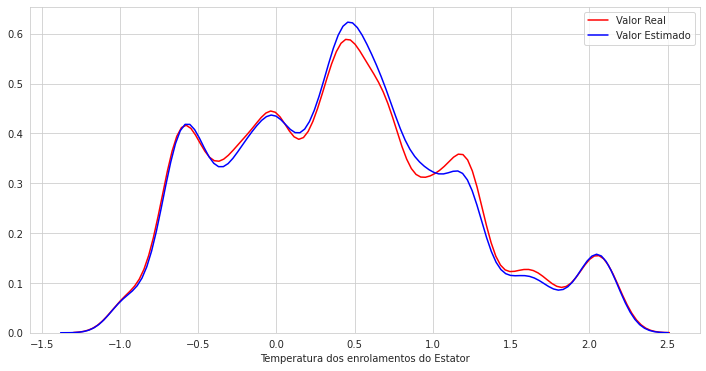

In [59]:
#Plotar os Valores Reais versus Valores Estimados para múltiplas sessões (profile_id)

#Define 4 profiles ID quaisquer.
test_run_list = np.array([27,45,60,74])

#Define a feature alvo.
output_value = 'stator_winding'

#Guarda o modelo gerado.
modelo = RFR_modelo
for i in range(0,len(test_run_list)):
    #1. Omite a feature 'torque' do dataframe.
    #2. Dentro do dataframe, seleciona os profile_id que correspondem aos especificados.
    #3. Dentro dos especificados, seleciona as colunas de 'ambient' até 'i_q'.
    #4. Captura os valores e, em seguida, guarda na variável X_plot.
    X_plot = df.drop('torque',axis=1).loc[df['profile_id'] == test_run_list[i], 
                                             'ambient':'i_q'].values
    #Mesma lógica explicada acima, com a diferença que captura somente os valores da coluna
    #'stator_winding'.
    y_plot = df.loc[df['profile_id'] == test_run_list[i], output_value].values
    
    #Retorna os valores estimados pelo modelo considerado as variáveis de entrada de X_plot.
    y_estimado_plot = modelo.predict(X_plot)

    
plt.figure(figsize=(12,6))

#Utilizar a função distplot da biblioteca seaborn para visualizar os valores reais
#versus valores estimados em uma curva de densidade de distribuição

ax3 = sns.distplot(y_plot, hist=False, color="r", label="Valor Real")

sns.distplot(y_estimado_plot, hist=False, color="b", label="Valor Estimado", ax=ax3,
            axlabel="Temperatura dos enrolamentos do Estator");

plt.savefig(f'/home/trs/Interviewers/Presentation/PMSMHist.png')
    


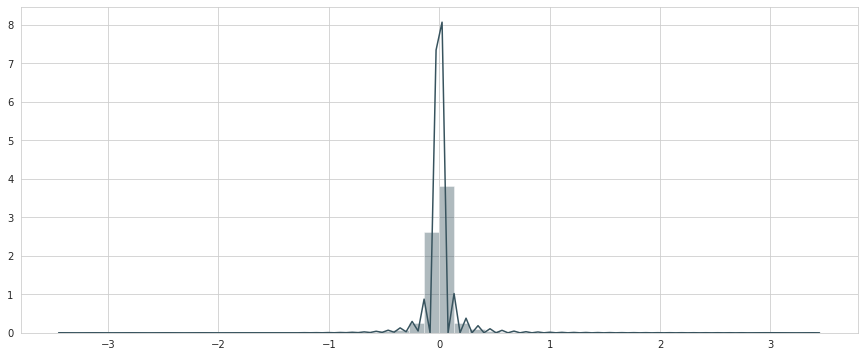

In [60]:
plt.figure(figsize=(15,6))

#Histograma dos resíduos. Se a distribuição for normal, é um bom sinal que a
#escolha do modelo foi boa.
sns.distplot(y_test-y_estimado, bins=50)

# FIM

### Referências utilizadas para elaborar esse notebook:
1. Dataset from Kaggle: https://www.kaggle.com/wkirgsn/electric-motor-temperature
2. Notebook from Kenneth(Kaggle): https://www.kaggle.com/ke2207/electric-motor-predicting-stator-temperature
3. Notebook from emilytires(Kaggle): https://www.kaggle.com/ke2207/electric-motor-predicting-stator-temperature
4. https://scikit-learn.org/
5. Consultas em meus notebooks para esclarecimento de funções já utilizadas em outros momentos.

Test bench measurements were collected by the LEA department at Paderborn University.